# TP3

In [1]:
import random
from math import exp, sqrt, ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
plt.rcParams['figure.figsize'] = [15, 5]

conn = sqlite3.connect("../TP2/findb.s3db")
cur = conn.cursor()

## Exercice 1

On choisit trois actifs (s1, s2, s3) dans la base de données findb.s3db;
On crée le portfeuille à partir de ces actions, avec les poids respectifs de 50%, 25%, 25%

In [2]:
s1_df = pd.read_sql_query("SELECT * FROM time_series WHERE instrumentid = 1", conn)
s2_df = pd.read_sql_query("SELECT * FROM time_series WHERE instrumentid = 2", conn)
s3_df = pd.read_sql_query("SELECT * FROM time_series WHERE instrumentid = 3", conn)

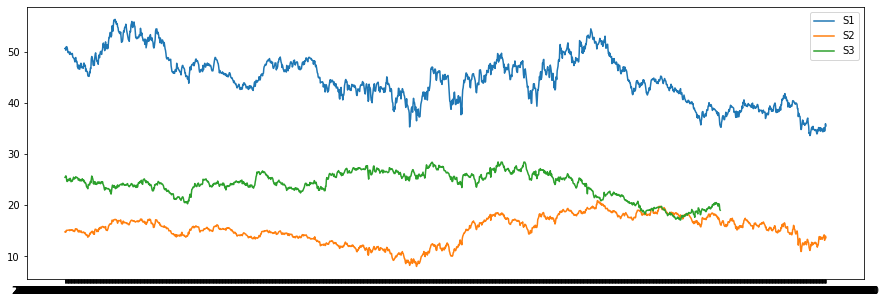

In [3]:
plt.plot(s1_df.date, s1_df.value, label="S1")
plt.plot(s2_df.date, s2_df.value, label="S2")
plt.plot(s3_df.date, s3_df.value, label="S3")
plt.legend()
plt.show()

In [4]:
# Constant Mix

# On travaille sur celui qui a le moins de données
length = min(s1_df.shape[0], s2_df.shape[0], s3_df.shape[0])

# Calcul des rendements
r1 = [0] * length
r2 = [0] * length
r3 = [0] * length

for i in range(1, length):
    r1[i] = s1_df.value[i] / s1_df.value[i - 1] -1
    r2[i] = s2_df.value[i] / s2_df.value[i - 1] -1
    r3[i] = s3_df.value[i] / s3_df.value[i - 1] -1

# Réplication

# Actions
s1 = [0] * length
s2 = [0] * length
s3 = [0] * length
s1[0], s2[0], s3[0] = 1, 1, 1

# Portefeuille
port = [0] * length
port[0] = 1

for i in range(1, length):
    s1[i] = s1[i - 1] * (1 + r1[i])
    s2[i] = s2[i - 1] * (1 + r2[i])
    s3[i] = s3[i - 1] * (1 + r3[i])
    
    port[i] = 0.5 * s1[i] + 0.25 * s2[i] + 0.25 * s3[i]

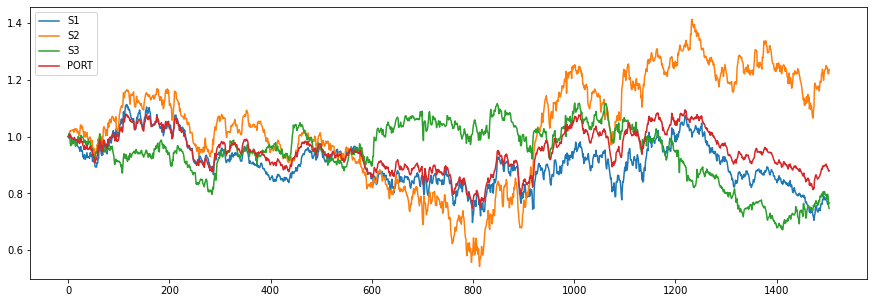

In [5]:
plt.plot(range(0, length), s1, label="S1")
plt.plot(range(0, length), s2, label="S2")
plt.plot(range(0, length), s3, label="S3")
plt.plot(range(0, length), port, label="PORT")
plt.legend()
plt.show()

In [6]:
# Buy and Hold

# On travaille sur celui qui a le moins de données
length = min(s1_df.shape[0], s2_df.shape[0], s3_df.shape[0])

# Calcul des rendements
r1 = [0] * length
r2 = [0] * length
r3 = [0] * length

for i in range(1, length):
    r1[i] = s1_df.value[i] / s1_df.value[0] -1
    r2[i] = s2_df.value[i] / s2_df.value[0] -1
    r3[i] = s3_df.value[i] / s3_df.value[0] -1

# Réplication

# Actions
s1 = [0] * length
s2 = [0] * length
s3 = [0] * length
s1[0], s2[0], s3[0] = 1, 1, 1

# Portefeuille
port = [0] * length
port[0] = 1

for i in range(1, length):
    s1[i] = s1[i - 1] * (1 + r1[i])
    s2[i] = s2[i - 1] * (1 + r2[i])
    s3[i] = s3[i - 1] * (1 + r3[i])
    
    port[i] = 0.5 * s1[i] + 0.25 * s2[i] + 0.25 * s3[i]

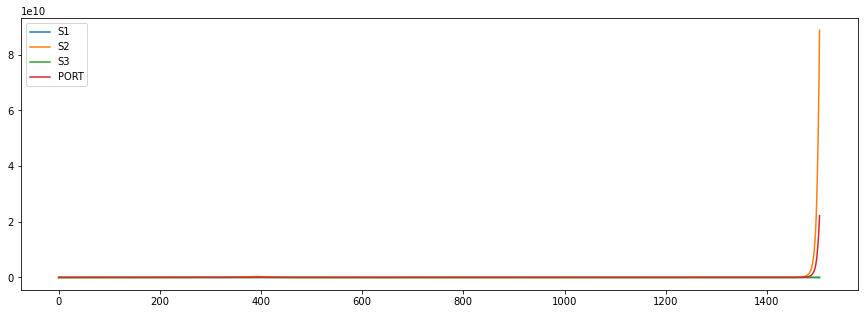

In [7]:
plt.plot(range(0, length), s1, label="S1")
plt.plot(range(0, length), s2, label="S2")
plt.plot(range(0, length), s3, label="S3")
plt.plot(range(0, length), port, label="PORT")
plt.legend()
plt.show()